## Conway's Game of Life 

https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

The Game of Life, also known as Conway's Game of Life or simply Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970.[1] It is a zero-player game,[2][3] meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves. It is Turing complete and can simulate a universal constructor or any other Turing machine.

The universe of the Game of Life is an infinite, two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead (or populated and unpopulated, respectively). Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur: <br>

1. Any live cell with fewer than two live neighbours dies, as if by underpopulation. <br>
2. Any live cell with two or three live neighbours lives on to the next generation. <br>
3. Any live cell with more than three live neighbours dies, as if by overpopulation. <br>
4. Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction. <br>

In [1]:
#Imports and Installs
import numpy as np
import csv
import random
import time
import matplotlib.pyplot as plt
from PIL import Image, ImageSequence
from IPython.display import display, clear_output, Image as IPImage


#### Functions

In [85]:
def check_health_alive(grid, index, frame):
    i, j = index
    # Count alive neighbors
    neighbors = 0
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    for dir_ind in directions:
        di, dj = dir_ind
        neighbors += grid[(i + di) % (np.size(grid,0)-1), (j + dj) % (np.size(grid,1)-1), frame]
    
    # Check against Rules 1-3
    # Underpopulated or Overpopulated?
    if neighbors < 2 or neighbors > 3: 
        health = False # Dead
    else:
        health = True # Lives on
    return health

In [86]:
def check_health_dead(grid, index, frame):
    i, j = index
    # Count alive neighbors
    neighbors = 0
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    for dir_ind in directions:
        di, dj = dir_ind
        neighbors += grid[(i + di) % (np.size(grid,0)-1), (j + dj) % (np.size(grid,1)-1), frame]
    
    # Check against Rules 4
    if neighbors == 3: 
        health = True # Reproduces
    else:
        health = False # Stays Dead
    return health

#### Init

In [293]:
# init grid

# Coordinates of Grid
grid_size = 30
numberOfFrames = 150

x_cords = range(0,grid_size)
y_cords = range(0,grid_size)
Frames = range(0, numberOfFrames) 


#### Block Starting Seeds

In [302]:
#Starting Block // Blockseed

Grid = np.zeros((len(x_cords),len(y_cords),len(Frames)))
k = 10
firstBlock_x, firstBlock_y = int(grid_size/2), int(grid_size/2)
Grid[firstBlock_x-k:firstBlock_x+k, firstBlock_y-k:firstBlock_y+k,0] = True


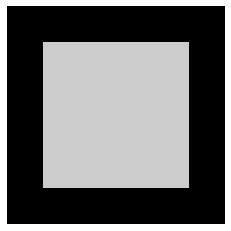

In [303]:
# Check Individual Frames
frame = 0
plt.imshow(Grid[:,:,frame], cmap='nipy_spectral', interpolation='nearest')
plt.axis('off')
plt.show()


#### Interesting Starting Seeds

In [304]:
#Starting Block // -L seed
Grid = np.zeros((len(x_cords),len(y_cords),len(Frames)))
firstBlock_x, firstBlock_y = int(grid_size/2), int(grid_size/2)

Grid[firstBlock_y-1:firstBlock_y+2, firstBlock_x, 0] = True
Grid[firstBlock_y, firstBlock_x-1, 0] = True
Grid[firstBlock_y+1, firstBlock_x+1, 0] = True

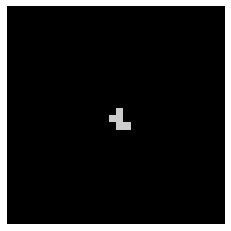

In [305]:
# Check Individual Frames
frame = 0
plt.imshow(Grid[:,:,frame], cmap='nipy_spectral', interpolation='nearest')
plt.axis('off')
plt.show()


#### Oscillators

In [306]:
# Starting Seed : Penta-decathlon (period 15)
Grid = np.zeros((len(x_cords),len(y_cords),len(Frames)))
firstBlock_x, firstBlock_y = int(grid_size/2), int(grid_size/2)

Grid[firstBlock_y-4:firstBlock_y+4, firstBlock_x-1:firstBlock_x+2, 0] = True
Grid[firstBlock_y+2, firstBlock_x, 0] = False
Grid[firstBlock_y-3, firstBlock_x, 0] = False

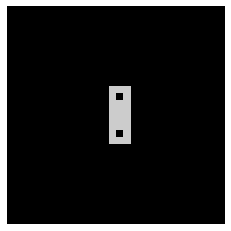

In [307]:
# Check Individual Frames
frame = 0
plt.imshow(Grid[:,:,frame], cmap='nipy_spectral', interpolation='nearest')
plt.axis('off')
plt.show()


#### Spaceships

In [ ]:
### Glider
Grid = np.zeros((len(x_cords),len(y_cords),len(Frames)))



In [ ]:
# Check Individual Frames
frame = 0
plt.imshow(Grid[:,:,frame], cmap='nipy_spectral', interpolation='nearest')
plt.axis('off')
plt.show()

In [296]:
# Game of Life Program

for f in Frames[0:-2]:
    for i in x_cords:
        for j in y_cords:
            index = (i,j)
            if Grid[i,j,f] == True: 
                Grid[i,j,f+1] = check_health_alive(Grid, index, f)
            else: 
                Grid[i,j,f+1] = check_health_dead(Grid, index, f)
                
    print('Frame:', f,'Completed')
    if f % 5 == 4:
        clear_output()
        np.save("./GoL/GoL_Grid.npy", Grid)
clear_output()
print('Program Complete!')

Program Complete!


In [297]:
# Define the scaling factor (e.g., 4x larger)
scale_factor = 8
new_size = (Grid.shape[0] * scale_factor, Grid.shape[1] * scale_factor)

frames = []

# Convert each 2D slice into an image
for i in range(np.size(Grid,2)):
    img = Image.fromarray((Grid[:,:,i] * 255).astype(np.uint8))
     # Resize the image
    img = img.resize(new_size, Image.NEAREST)  # Use NEAREST to keep pixelated look
    frames.append(img)

# Save as a GIF
isSaving = True
if isSaving == True: 
    gif_path = "./GoL/PentaDeca.gif"
    frames[0].save(gif_path, save_all=True, append_images=frames[1:], duration=200, loop=5)


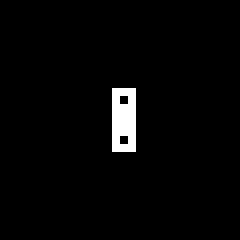

In [298]:
display(IPImage(gif_path))

In [ ]:
#interesting results

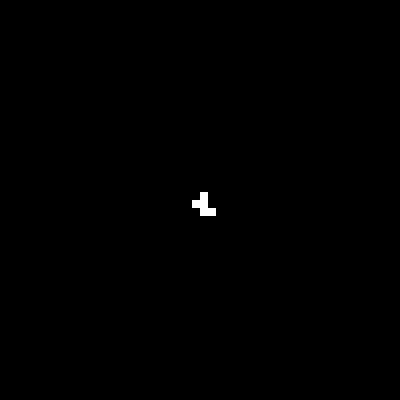

In [300]:
display(IPImage("./GoL/NotchedLseed.gif"))

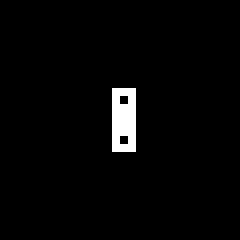

In [301]:
display(IPImage("./GoL/PentaDeca.gif"))